In [71]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [72]:
import math, scipy, sympy
from bs4 import BeautifulSoup as BS
import requests, re, urllib

from urllib import robotparser, request
from urllib.request import urlopen
import chardet

import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep

import os, sys, json

import cx_Oracle

In [73]:
from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## 분류 평가

- 정확도(Accuracy): 가장 직관적으로 이해할 수 있는 지표로, 전체 예측 데이터 중 예측이 정확한 데이터의 비율을 의미합니다. 하지만 이는 불균형한 레이블 클래스를 가진 경우, 즉 특정 클래스의 데이터가 많을 때 모델의 성능을 왜곡할 수 있습니다.

- 오차 행렬(Confusion Matrix): 이진 분류에서 성능을 나타내는 행렬로, FP, FN, TP, TN의 4분면으로 이루어져 있습니다. 각각은 다음과 같습니다.

    - True Positive(TP): 실제 값과 예측 값이 모두 Positive(1)인 경우
    - False Positive(FP): 실제 값은 Negative(0)인데 Positive(1)로 잘못 예측한 경우
    - False Negative(FN): 실제 값은 Positive(1)인데 Negative(0)로 잘못 예측한 경우
    - True Negative(TN): 실제 값과 예측 값이 모두 Negative(0)인 경우
- 정밀도(Precision)와 재현율(Recall):

    - 정밀도: TP / (FP + TP). Positive로 예측한 대상 중에 실제 값이 Positive인 데이터의 비율을 의미합니다.
    - 재현율: TP / (FN + TP). 실제 값이 Positive인 대상 중에 예측과 실제 값이 모두 Positive인 데이터 비율을 의미합니다.
    - F1 스코어: 정밀도와 재현율을 결합한 지표로, 이 두 값이 어느 한 쪽으로 치우치지 않을 때 높은 값을 가집니다.

    - ROC-AUC: Receiver Operation Characteristic Curve와 이 곡선의 면적인 Area Under Curve를 의미합니다. 이진 분류의 예측 성능 측정에서 중요하게 사용되며, 1에 가까울수록 좋은 수치를 나타냅니다.

- 위의 지표들은 sklearn.metrics 모듈에서 제공하는 다양한 API를 통해 쉽게 계산할 수 있습니다. 이 지표들을 통해 모델의 성능을 평가하고, 모델 간 성능을 비교하거나, 하이퍼파라미터 튜닝 등을 통해 모델을 개선할 수 있습니다.

* TP, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
* 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
* TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
* 정확도 = (TP + TN) / ( TP + TN + FP + FN)
* 정밀도 = TP / ( TP + FP)
* 재현율 = TP / ( TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
* F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)
* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)
* 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생

In [5]:
df = pd.read_csv(r'C:\Users\h\hmkd1\mc_data\train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 일괄 전처리
df = pd.read_csv(r'C:\Users\h\hmkd1\mc_data\train.csv')

def nullskip(df):   #널값 처리
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    maxvalue = df['Embarked'].value_counts(dropna=True).idxmax()
    df['Embarked'].fillna(maxvalue, inplace=True)
    return df

def get_age(age):
    cat = ''
    if age < 5: cat='Baby'
    elif age < 15: cat= 'Child'
    elif age < 21: cat= 'Young Adult'
    elif age < 49: cat='Adult'
    elif age < 70: cat='Old'
    else: cat = 'Elder'
    return cat

def get_cate(fare):
    cat=''
    if fare<=15: cat='저가'
    elif fare<=60: cat='중가'
    elif fare<=200: cat='고가'
    else: cat='프리미엄'
    return cat

def drop_col(df):   #불필요한 속성(칼럼) 제거
    df['Family'] = df.SibSp + df.Parch
    df['Cabin'] = df['Cabin'].str[:1]
    
    df.drop(['PassengerId','Ticket','SibSp','Name','Parch'], axis=1, inplace=True)
    return df

def format_enc(df):   #레이블 인코딩 수행
    features = ['Cabin','Sex','Embarked', 'Family', 'Age','Fare']
    for i in features:
        le = LabelEncoder()
        le = le.fit(df[i])
        df[i] = le.transform(df[i])      
    return df

def trans(df):   #위에서 만들어둔 함수들 호출
    df = nullskip(df)
    df['Age'] = df.Age.apply(lambda x: get_age(x))
    df['Fare'] = df.Fare.apply(lambda x: get_cate(x))
    df = drop_col(df)
    df = format_enc(df)
    return df

trans(df)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,1,0,1,7,2,1
1,1,1,0,0,0,2,0,1
2,1,3,0,0,1,7,2,0
3,1,1,0,0,2,2,2,1
4,0,3,1,0,1,7,2,0
...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,7,2,0
887,1,1,0,5,2,1,2,0
888,0,3,0,0,2,7,2,3
889,1,1,1,0,2,2,0,0


#### 과제(1): 위에 전처리 함수들 수정/보완 + decisiontree사용해서 모델링 성능평가 수행

In [8]:
dtree = DecisionTreeClassifier(random_state=156)

data = df.drop('Survived', axis=1)
label = df['Survived']

scores = cross_val_score(dtree, data, label, scoring='accuracy', cv=10)
print(f'교차 검증별 정확도: {scores}')
print(f'평균 검증 정확도: {np.mean(scores)}')
# 교차 검증을 통해 모델의 성능을 다양한 데이터(각각의 폴드)로 평가

교차 검증별 정확도: [0.75555556 0.82022472 0.75280899 0.85393258 0.84269663 0.80898876
 0.80898876 0.75280899 0.85393258 0.7752809 ]
평균 검증 정확도: 0.802521847690387


In [32]:
X_titanic_df = df.drop('Survived', axis=1)
y_titanic_df = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=234)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test,pred)
print('모델의 정확도:',accuracy_dt)
# 단일 테스트 세트(x_test)에서의 모델 성능

모델의 정확도: 0.8268156424581006


In [10]:
df = pd.read_csv(r'C:\Users\h\hmkd1\mc_data\train.csv')

dtree = DecisionTreeClassifier(random_state=231)

xdf = df.drop('Survived', axis=1)
xdf = trans(xdf)
ydf = df['Survived']

xtrain, xtest, ytrain, ytest = train_test_split(xdf, ydf, test_size=0.3, random_state=231)

dtree.fit(xtrain, ytrain)
pred = dtree.predict(xtest)
acc =accuracy_score(ytest, pred)

print(f'dtc정확도: {acc}')

dtc정확도: 0.8208955223880597


In [11]:
# 강사님 코드(로지스틱 회귀)
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측
titanic_df = pd.read_csv(r'C:\Users\h\hmkd1\mc_data\train.csv')

y_titanic_df = titanic_df['Survived']

X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = trans(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)
lr_clf = LogisticRegression()
# 로지스틱 회귀: 이진 분류 수행(0, 1)

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy_Ir = accuracy_score (y_test,pred)

accuracy_Ir
#len(X_test)

0.8379888268156425

In [12]:
pred_proba = lr_clf.predict_proba(X_test)
# pred_proba: 입력 데이터가 각 클래스(0(사망),1(생존))에 속할 확률을 반환
pred = lr_clf.predict(X_test)

print(type(pred_proba[:3]))

type(pred.reshape(-1,1))
pred.reshape(-1,1)[:3]

pred_proba[:3]
# pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)])

<class 'numpy.ndarray'>


array([[0.37879002, 0.62120998],
       [0.88571347, 0.11428653],
       [0.8647675 , 0.1352325 ]])

In [13]:
# 타이타닉 생존 데이터를 학습한 Logistichegression 객체에서 predict_proba() 메서드 수행
# 수행한 뒤 반환 값을 확인하고 predict() 메서드와 비교
#predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba) Shape {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
print('pred에서 앞 3개만 샘플로 추출\n:', pred[:3])
print('pred.reshape(-1, 1)에서 앞 3개만 샘플로 추출 \n:',pred.reshape(-1, 1)[:3])
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])
type(pred_proba_result)

pred_proba) Shape (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 [[0.37879002 0.62120998]
 [0.88571347 0.11428653]
 [0.8647675  0.1352325 ]]
pred에서 앞 3개만 샘플로 추출
: [1 0 0]
pred.reshape(-1, 1)에서 앞 3개만 샘플로 추출 
: [[1]
 [0]
 [0]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.37879002 0.62120998 1.        ]
 [0.88571347 0.11428653 0.        ]
 [0.8647675  0.1352325  0.        ]]


numpy.ndarray

In [14]:
# 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호보완적으로 조정 

# threshold 변수를 특정 값으로 설정 -> 사이킷런의 Binarizer 클래스를 객체로 생성
# -> fit_transform() 메서드를 이용해 넘파이 배열 입력
# -> threshold보다 같거나 작으면 0, 크면 1값 반환
x = [[ 1, -1, 2],[ 2, 0, 0],[0, 1.1, 1.2]]
     
# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환 
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### 과제(2): 랜덤하게 2차원 배열을 생성한 후 임계값을 0.5로 지정하고, 임계값보다 크면 1, 작으면 0으로 변환

In [15]:
arr = np.random.rand(7,3)
print(arr)

binarizer = Binarizer(threshold=0.5)
binarizer.fit_transform(arr)

[[0.56404066 0.05790836 0.39624716]
 [0.69990328 0.35429058 0.63649716]
 [0.42505278 0.21662691 0.92387273]
 [0.63603424 0.85128768 0.56840966]
 [0.3664868  0.23376202 0.15404827]
 [0.11356569 0.2304632  0.2880025 ]
 [0.89963265 0.76113253 0.68909653]]


array([[1., 0., 0.],
       [1., 0., 1.],
       [0., 0., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.]])

In [16]:
#### 생존 확률을 선택해서 임곗값 0.5를 기준과 비교하여 예측
print('pred_proba: \n', pred_proba[0:5], '\n')

# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)   #생존확률만 뽑기
print('생존확률: \n', pred_proba_1[0:5])

custom_threshold = 0.5   #임계값
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)

custom_predict = binarizer.transform(pred_proba_1)
custom_predict[0:5]

pred_proba: 
 [[0.37879002 0.62120998]
 [0.88571347 0.11428653]
 [0.8647675  0.1352325 ]
 [0.76045228 0.23954772]
 [0.85784085 0.14215915]] 

생존확률: 
 [[0.62120998]
 [0.11428653]
 [0.1352325 ]
 [0.23954772]
 [0.14215915]]


array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [17]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    # (TN) (FP)  혼동행렬 분류 결과 순서
    # (FN) (TP)
    
    accuracy = accuracy_score(y_test, pred)   #정확도((TP+TN) / (TP+TN+FP+FN))
    precision = precision_score(y_test, pred)   #정밀도(TP / (TP+FP)):
    recall = recall_score(y_test, pred)   #재현율(TP / (TP+FN)):
    f1 = f1_score (y_test, pred)   #f1 score(2 * (정밀도*재현율) / (정밀도+재현율))
    
    print('오차 행렬')
    print(confusion,'\n')
    
    print(f'''정확도: {accuracy:.4f}, 
정밀도 : {precision:.4f}, 
재현율 : {recall:.4f}, 
f1 score: {f1:.4f}''')
# f1 = 2 * ((55/(29+55)) * (55/(6+55))) / ((55/(29+55)) + (55/(6+55)))
                                                             
get_clf_eval(y_test, custom_predict)

오차 행렬
[[102  16]
 [ 13  48]] 

정확도: 0.8380, 
정밀도 : 0.7500, 
재현율 : 0.7869, 
f1 score: 0.7680


In [18]:
# 분류 결정 임곗값은 positive 예측값을 결정하는 확률의 기준
# 임곗값을 낮출수록 True값이 많아지게 되며, positive 예측값이 많아지면
# FN은 하락해서 재현율은 올라감
# Binarizer의 threshold 설정값=0.4(분류 결정 임곗값을 0.5 -> 0.4 낮춤)

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

custom_threshold = 0.4
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)   #위에 사용자정의 함수 호출

오차 행렬
[[94 24]
 [ 9 52]] 

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591


In [19]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]   #임계값

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # 리스트 내 값을 차례로 반복하며 평가 수행
    for i in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        
        print(f'임계값: {i}')
        get_clf_eval(y_test, custom_predict)
        print('--------------------------------')
    
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)
#사용자 함수 호출 (임계치 바꿔가며 결과 조회)

임계값: 0.4
오차 행렬
[[94 24]
 [ 9 52]] 

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------
임계값: 0.45
오차 행렬
[[94 24]
 [ 9 52]] 

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------
임계값: 0.5
오차 행렬
[[94 24]
 [ 9 52]] 

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------
임계값: 0.55
오차 행렬
[[94 24]
 [ 9 52]] 

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------
임계값: 0.6
오차 행렬
[[94 24]
 [ 9 52]] 

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------


In [20]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
# 정밀도, 재현율, 임계값
type(thresholds)    # numpy.ndarray
print(thresholds.shape)   #143개
pd.Series(thresholds).value_counts   #143개 전부 다른 값

thr_index = np.arange(0, thresholds.shape[0], 15)
#배열 -> 0부터 thresholds길이만큼, 15씩 건너뛰기
print(thr_index)
np.round(thresholds[thr_index], 2)

(90,)
[ 0 15 30 45 60 75]


array([0.11, 0.22, 0.45, 0.57, 0.68, 0.88])

In [21]:
# 임곗값, 정밀도, 재현율 비교 (임곗값을 15 step으로 추출)
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]   # X_test셋에 대한 예측 확률 반환
print (pred_proba_class1[0:10], '\n')

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
# 정밀도, 재현율, 임계값

print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('정밀도:', precisions [0:5])
print('재현율:', recalls[0:5])
print('임곗값:', thresholds [0:5], '\n')

print(pd.Series(thresholds).value_counts, '\n')

thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index, '\n')

print(np.round(thresholds [ thr_index],2))
# len(pred_proba_class1)

[0.62120998 0.11428653 0.1352325  0.23954772 0.14215915 0.23876006
 0.11428653 0.6947319  0.21678054 0.76763262] 

반환된 분류 결정 임곗값 배열의 Shape: (90,)
정밀도: [0.37195122 0.44615385 0.4496124  0.453125   0.46280992]
재현율: [1.         0.95081967 0.95081967 0.95081967 0.91803279]
임곗값: [0.11428653 0.12543939 0.13472707 0.1352325  0.14127545] 

<bound method IndexOpsMixin.value_counts of 0     0.114287
1     0.125439
2     0.134727
3     0.135232
4     0.141275
        ...   
85    0.930833
86    0.941519
87    0.944705
88    0.946556
89    0.953200
Length: 90, dtype: float64> 

[ 0 15 30 45 60 75] 

[0.11 0.22 0.45 0.57 0.68 0.88]


[0.62120998 0.11428653 0.1352325  0.23954772 0.14215915 0.23876006
 0.11428653 0.6947319  0.21678054 0.76763262]


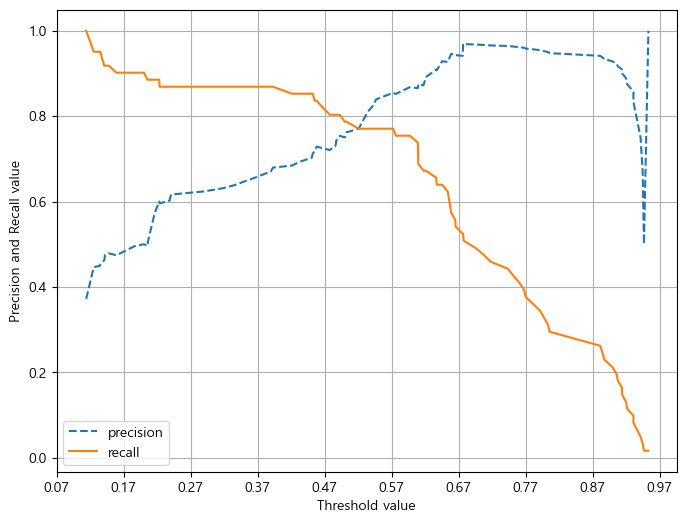

In [22]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class1[0:10])

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
# 임계값에 따른 정밀도, 임계값에 따른 재현율, 임계값
# 임계값에 따른 정밀도와 재현율을 보는 곡선 그래프에 사용

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve (y_test, pred_proba_c1)
#     print(list(thresholds))

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]   #thresholds 길이만큼
    
#     print(threshold_boundary)
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 정밀도(precisions)
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    # 재현율(recalls)
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()   # x축 범위만큼
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
# 그래프 함수 호출

### 결과 해석
- 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐. (FN이 작아지고 FP가 커짐)
- 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습 을 보임.
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보 완할 수 있는 수준에서 적용

### 정밀도 및 재현율 활용시 유의 사항
- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능.
- 정밀도 100%가 되는 방법: 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측 전체 환자
1000명중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 P로 예측하고 나머지는 모두 N으로 예측 FP 는 0, TP는 1이 되며 정밀도(TP/(TP+FP)는 1/(1+0)= 1
- 재현율이 100%가 되는 방법: 모든 환자를 Positive로 예측 1000명의 환자중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 0이므로 재현율(TP/(TP+FN))은 30/(30+0)=1
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 됨

In [23]:
# F1 스코어: 정밀도와 재현율을 결합한 지표
# F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7680


In [24]:
# 임계값을 변화시키면서 F1 스코어를 포함한평가 지표 산출
# get_eval_by_threshold() 선실행

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)    # F1 스코어 추가
    
    print(f'오차 행렬 \n{confusion}\n')
    print(f'''정확도: {accuracy:.4f}, 
정밀도 : {precision:.4f}, 
재현율 : {recall:.4f}, 
f1 score: {f1:.4f}''')
    
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# F1 스코어는 임곗값이  0.6일때 가장 좋은 값을 보여주지만 재현율이 크게 감소하는 점 유의

임계값: 0.4
오차 행렬 
[[94 24]
 [ 9 52]]

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------
임계값: 0.45
오차 행렬 
[[94 24]
 [ 9 52]]

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------
임계값: 0.5
오차 행렬 
[[94 24]
 [ 9 52]]

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------
임계값: 0.55
오차 행렬 
[[94 24]
 [ 9 52]]

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------
임계값: 0.6
오차 행렬 
[[94 24]
 [ 9 52]]

정확도: 0.8156, 
정밀도 : 0.6842, 
재현율 : 0.8525, 
f1 score: 0.7591
--------------------------------


#### ROC 곡선과 AUC
* 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
* FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), TPR은 재현율(민감도)를 나타냄.
* TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
* ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함.
* FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨. 
* FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

#### ROC 곡선(Receiver Operating Characteristic curve), AUC
- 분류 모델의 성능을 시각화하는 데 사용되는 그래프입니다.
- 이 그래프는 분류 모델의 임계값(threshold)을 변화시키면서, True Positive Rate(TPR)에 대한 FPR의 변화를 나타냅니다.
- FPR은 "False Positive Rate"의 약자로, 거짓 양성 비율을 나타내는 지표입니다. 
    - TPR = TP / (TP + FN)
    - FPR = FP / (FP + TN) = 1 - 특이도(TN/(FP + TN))
- FPR은 0부터 1까지의 값을 가지며, 분류 모델의 임계값에 따라 변화합니다. 
- 임계값이 낮을수록 모델은 더 많은 샘플을 양성으로 분류하며, 이로 인해 FPR은 증가합니다. 
- 임계값이 높을수록 모델은 더 많은 샘플을 음성으로 분류하며, FPR은 감소합니다.
- ROC 곡선은 FPR을 x축에, TPR(민감도, True Positive Rate)를 y축에 나타냅니다. 따라서 ROC 곡선은 임계값 변화에 따른 모델의 TPR과 FPR의 관계를 보여줍니다. 
- 좋은 분류 모델은 FPR이 낮은 상태에서 높은 TPR을 유지하는 곡선이 되어야 합니다. 
- ROC 곡선의 아래쪽 면적인 AUC(Area Under the Curve)는 분류 모델의 성능을 종합적으로 평가하는 지표로 사용됩니다. 
- AUC가 1에 가까울수록 모델의 성능이 우수하다고 판단할 수 있습니다.

#### 과제(3): 타이타닉 데이터셋으로 모델링한 후, ROC AUC를 포함한 모든 분류 평가지표를 사용해 평가를 수행 + ROC AUC 시각화

In [25]:
# 일괄 전처리
df = pd.read_csv(r'C:\Users\h\hmkd1\mc_data\train.csv')

def nullskip(df):   #널값 처리
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    maxvalue = df['Embarked'].value_counts(dropna=True).idxmax()
    df['Embarked'].fillna(maxvalue, inplace=True)
    return df

def get_age(age):
    cat = ''
    if age < 5: cat='Baby'
    elif age < 15: cat= 'Child'
    elif age < 21: cat= 'Young Adult'
    elif age < 49: cat='Adult'
    elif age < 70: cat='Old'
    else: cat = 'Elder'
    return cat

    cat=''
    if fare<=15: cat='저가'
    elif fare<=60: cat='중가'
    elif fare<=200: cat='고가'
    else: cat='프리미엄'
    return cat

def drop_col(df):   #불필요한 속성(칼럼) 제거
    df['Family'] = df.SibSp + df.Parch
    df['Cabin'] = df['Cabin'].str[:1]
    
    df.drop(['PassengerId','Ticket','SibSp','Name','Parch'], axis=1, inplace=True)
    return df

def format_enc(df):   #레이블 인코딩 수행
    features = ['Cabin','Sex','Embarked', 'Family', 'Age','Fare']
    for i in features:
        le = LabelEncoder()
        le = le.fit(df[i])
        df[i] = le.transform(df[i])      
    return df

def trans(df):   #위에서 만들어둔 함수들 호출
    df = nullskip(df)
    df['Age'] = df.Age.apply(lambda x: get_age(x))
    df['Fare'] = df.Fare.apply(lambda x: get_cate(x))
    df = drop_col(df)
    df = format_enc(df)
    return df

trans(df)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,1,0,1,7,2,1
1,1,1,0,0,0,2,0,1
2,1,3,0,0,1,7,2,0
3,1,1,0,0,2,2,2,1
4,0,3,1,0,1,7,2,0
...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,7,2,0
887,1,1,0,5,2,1,2,0
888,0,3,0,0,2,7,2,3
889,1,1,1,0,2,2,0,0


In [26]:
dtree = DecisionTreeClassifier(random_state=156)

data = df.drop('Survived', axis=1)
label = df['Survived']

scores = cross_val_score(dtree, data, label, scoring='accuracy', cv=10)
print(f'교차 검증별 정확도: {scores}')
print(f'평균 검증 정확도: {np.mean(scores)}')

교차 검증별 정확도: [0.75555556 0.82022472 0.75280899 0.85393258 0.84269663 0.80898876
 0.80898876 0.75280899 0.85393258 0.7752809 ]
평균 검증 정확도: 0.802521847690387


In [27]:
def get_lg_eval(ytest, pred, pred_proba):
    confusion = confusion_matrix(ytest, pred)
    
    acc = accuracy_score(ytest, pred)
    precision = precision_score(ytest, pred)
    recall = recall_score(ytest, pred)
    f1 = f1_score(ytest, pred)
    
    roc_auc = roc_auc_score(ytest, pred_proba[:, 1])
    
    print(f'오차행렬:\n{confusion}\n')
    print(f'정확도: {acc}')
    print(f'정밀도: {precision}')
    print(f'재현율: {recall}')
    print(f'f1_score: {f1}')
    print(f'roc_auc: {roc_auc}')

In [28]:
ydf = df['Survived']
xdf = df.drop('Survived', axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(xdf, ydf, test_size=0.2, random_state=1231)

lg = LogisticRegression()
lg.fit(xtrain,ytrain)

pred_proba = lg.predict_proba(xtest)
pred = lg.predict(xtest)

get_lg_eval(ytest, pred, pred_proba)

오차행렬:
[[89 19]
 [19 52]]

정확도: 0.7877094972067039
정밀도: 0.7323943661971831
재현율: 0.7323943661971831
f1_score: 0.7323943661971831
roc_auc: 0.8343114241001566


In [29]:
from sklearn.metrics import roc_curve

pred_proba_c1 = lg.predict_proba(xtest)[:,1]
fprs, tprs, thresholds = roc_curve(ytest, pred_proba_c1)

thr_index = np.arange(1, thresholds.shape[0], 5)   # 5단위로 추출
print(f'샘플 추출을 위한 임계값 배열의 index: {thr_index}')
print(f'샘플 인덱스로 추출한 임계값: {np.round(thresholds[thr_index],3)}')

#임계값에 따른 FPR, TPR값
print(f'샘플 임계값별 FPR: {np.round(fprs[thr_index],3)}')
print(f'샘플 임계값별 TPR: {np.round(tprs[thr_index],3)}')

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51 56]
샘플 인덱스로 추출한 임계값: [0.96  0.805 0.698 0.635 0.581 0.52  0.432 0.356 0.224 0.16  0.092 0.065]
샘플 임계값별 FPR: [0.    0.    0.056 0.083 0.139 0.176 0.231 0.287 0.324 0.509 0.87  0.944]
샘플 임계값별 TPR: [0.014 0.352 0.479 0.521 0.648 0.732 0.789 0.817 0.873 0.887 0.944 1.   ]


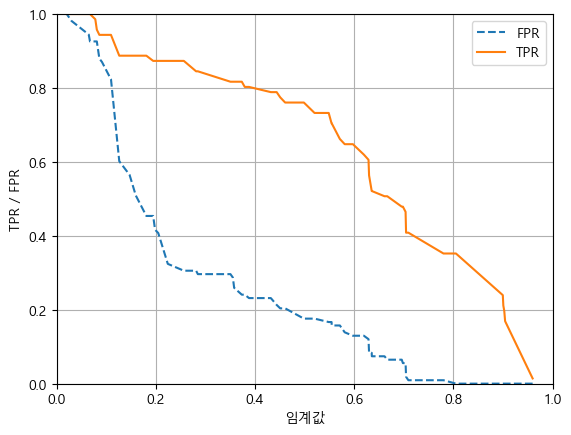

In [62]:
pred_proba_c1 = lg.predict_proba(xtest)[:,1]
fprs, tprs, thresholds = roc_curve(ytest, pred_proba_c1)

thr_index = np.arange(1, thresholds.shape[0], 1)   #인덱스값을 1단위로 추출
# thresholds[thr_index]   #임계값
# fprs[thr_index]   # FPR값
# tprs[thr_index]   # TPR값

plt.plot(thresholds[thr_index], fprs[thr_index], linestyle='--', label='FPR')
plt.plot(thresholds[thr_index], tprs[thr_index], label='TPR')

plt.xlabel('임계값'); plt.ylabel('TPR / FPR')
plt.legend(); plt.grid()
plt.xlim([0, 1]); plt.ylim([0, 1])
plt.show()

- ROC_Curve는 임계값이 작아질 수록 FPR이 점점 커짐
- FPR이 조금씩 커질 때 TPR은 가파르게 커짐
- AUC가 커지려면 -> FPR이 작을 때 TPR을 키워야 함
- 일반적으로 분류모델의 성능은 AUC값이 0.5 이상일 때 좋은 것으로 간주됨

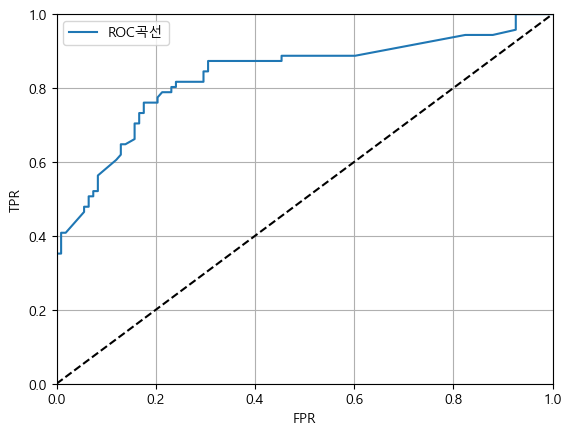

In [59]:
pred_proba_c1 = lg.predict_proba(xtest)[:,1]
fprs, tprs, thresholds = roc_curve(ytest, pred_proba_c1)
thr_index = np.arange(1, thresholds.shape[0], 1)

plt.plot(fprs[thr_index], tprs[thr_index], label='ROC곡선')
# ROC = 임계값 변화에 따른 모델의 TPR, FPR관계
# AUC = ROC곡선의 아래쪽 면적
# 일반적으로 분류모델의 성능은 AUC값이 0.5 이상일 때 좋은 것으로 간주됨

plt.xlabel('FPR'); plt.ylabel('TPR')
plt.legend(); plt.grid(); 
plt.plot([0,1],[0,1],'k--')  #그냥 보조 직선
plt.xlim([0, 1]); plt.ylim([0, 1])

plt.show()

임계값: [0.95 0.87 0.77 0.67 0.65 0.61 0.53 0.48 0.27 0.2  0.13 0.09]
FPR: [0.   0.   0.02 0.03 0.07 0.12 0.21 0.28 0.34 0.45 0.55 0.94]
TPR: [0.02 0.3  0.45 0.58 0.69 0.73 0.77 0.78 0.88 0.89 0.92 0.98]


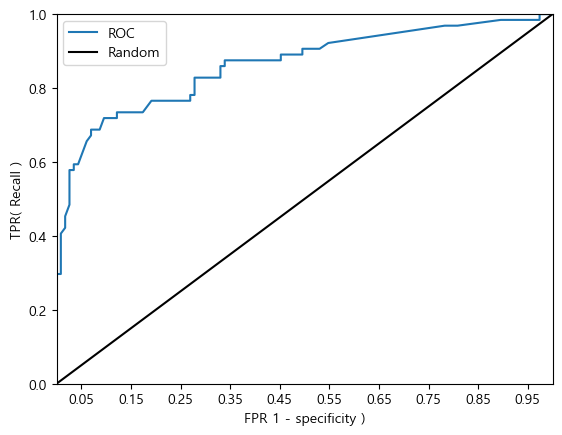

In [68]:
# 강사님 코드
from sklearn.metrics import roc_curve
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve (y_test, pred_proba_c1)
thr_index = np.arange(1, thresholds.shape[0],5)

print('임계값:',np.round(thresholds[thr_index],2))
print('FPR:',np.round(fprs[thr_index],2))
print('TPR:',np.round(tprs[thr_index],2))

def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs, tprs, thresholds = roc_curve (y_test,pred_proba_c1)
    
    #ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k-', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR 1 - specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend(); plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test) [:, 1])

In [83]:
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC값: {roc_score:0.4f}')

ROC AUC값: 0.8630


In [81]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print(f'오차행렬: \n{confusion}')
    print(f'''
정확도: {acc:0.4f}
정밀도: {precision:0.4f}
재현율: {recall:0.4f}
f1_score: {f1:0.4f}
AUC: {roc_auc:0.4f}''')
    
get_clf_eval(y_test, pred, pred_proba)

오차행렬: 
[[99 16]
 [15 49]]

정확도: 0.8268
정밀도: 0.7538
재현율: 0.7656
f1_score: 0.7597
AUC: 0.8630


(교재 172p 까지가 과제나온 것들 범위)